# 5 - Rotary spectra

Loads rotary data and then plots for various circumstances.

## Imports
Necessary modules for analysis.

In [1]:
# import modules

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
for i in range(2):
    %matplotlib notebook

In [15]:
# import data

adcp = 'Slope'     # Slope(2013,2014,2017,2018), Axis75(2013,2014), Axis55(2017,2018)
year = 2018
ds = xr.open_dataset(f'../Data/data/rot/rot_{adcp}_{year}.nc')
#print(ds)

In [16]:
# extract plotting variables & GM

t_stamp = ds.t_stamp
depth = ds.depth.values
f = ds.f_rot.values

# GM spectrum

gm = np.loadtxt('../project/archive/GM/gm.dat')   # get GM data from separate code
gm_freq = gm[:, 0]                                # GM based on N at -904 m
gm_cw = gm[:, 2]
gm_ccw = gm[:, 3]

## Depth comparison rotary spectra

In [17]:
# select depths

dupidx = 0                                     # upper depth
dlowidx = -1                                   # lower depth

dup_stamp = -depth[dupidx]                     # stamps for plotting
dlow_stamp = -depth[dlowidx]

cw_up = ds.cw_rot[dupidx].values               # data for plotting
ccw_up = ds.ccw_rot[dupidx].values
cw_low = ds.cw_rot[dlowidx].values
ccw_low = ds.ccw_rot[dlowidx].values

cw_up_upper = ds.cw_conf_upper[dupidx].values    # confidence intervals
cw_up_lower = ds.cw_conf_lower[dupidx].values
ccw_up_upper = ds.ccw_conf_upper[dupidx].values
ccw_up_lower = ds.ccw_conf_lower[dupidx].values
cw_low_upper = ds.cw_conf_upper[dlowidx].values
cw_low_lower = ds.cw_conf_lower[dlowidx].values
ccw_low_upper = ds.ccw_conf_upper[dlowidx].values
ccw_low_lower = ds.ccw_conf_lower[dlowidx].values

<IPython.core.display.Javascript object>


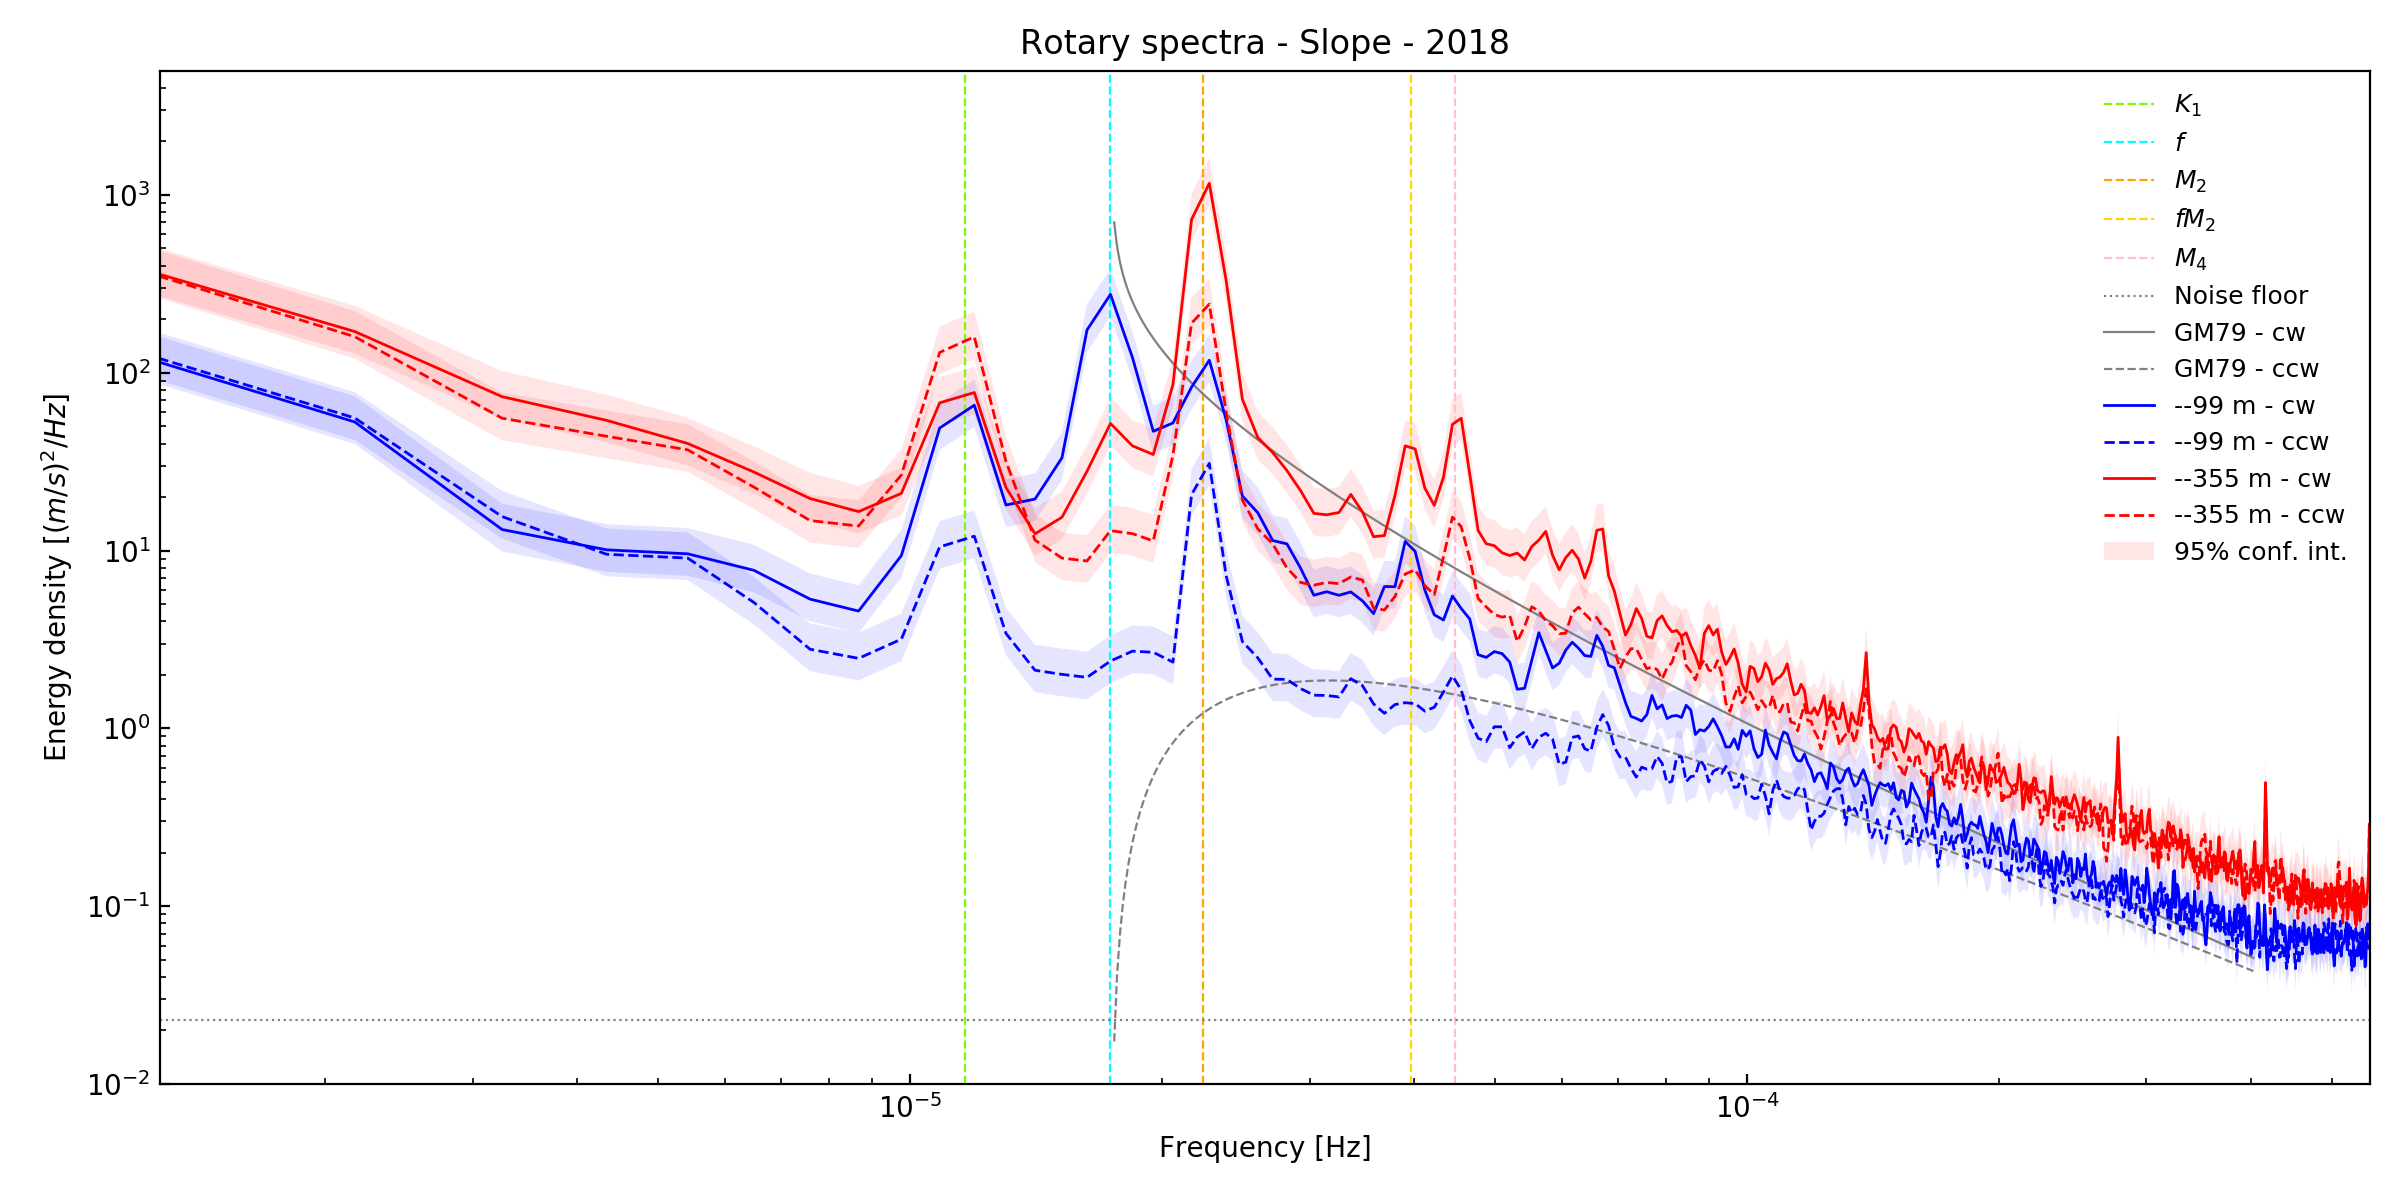

In [18]:
# plot rotary

fig,ax = plt.subplots(1,1,figsize=(12,6))               # plot CCW and CW components
ax.set_title(f'Rotary spectra - {adcp} - {t_stamp}')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel(f'Energy density [$(m/s)^2/Hz$]')
ax.set_ylim(1e-2,5e3)          # set y limits for comparing PSD
ax.set_xlim(1.27e-6, 5.55e-4)  # first non-zero freq bin to the Nyquist freq 
ax.tick_params(axis='both', direction='in', which='both')

ax.axvline(1.161e-5, color ='lawngreen',ls='--',lw=0.8,label = "$K_1$") 
ax.axvline(1.732e-5, color ='cyan',ls='--', lw=0.8,label = "$f$")    
ax.axvline(2.236e-5, color ='orange',ls='--',lw=0.8,label = "$M_2$")
ax.axvline(3.968e-5, color ='gold',ls='--',lw=0.8,label = "$fM_2$")
ax.axvline(4.472e-5, color ='pink',ls='--',lw=0.8,label = "$M_4$")
if adcp == 'Axis75' or adcp == 'Slope':
    ax.axhline(2.3e-2,color='gray',ls=':',lw=0.8,label='Noise floor')
elif adcp == 'Axis55':
    ax.axhline(0.53,color='gray',ls=':',lw=0.8,label='Noise floor')
    
ax.loglog(gm_freq/(2*np.pi),gm_cw*(2*np.pi),color='gray',lw=0.8, label = 'GM79 - cw') 
ax.loglog(gm_freq/(2*np.pi),gm_ccw*(2*np.pi),color='gray',lw=0.8,ls='--', label = 'GM79 - ccw') 

ax.loglog(f, cw_up, label=f'-{dup_stamp} m - cw',color='blue',lw=1)
ax.loglog(f, ccw_up, label=f'-{dup_stamp} m - ccw',color='blue',ls='--',lw=1)
ax.loglog(f, cw_low, label=f'-{dlow_stamp} m - cw',color='red',lw=1)
ax.loglog(f, ccw_low, label=f'-{dlow_stamp} m - ccw',color='red',ls='--',lw=1)

ax.fill_between(f, cw_up_lower, cw_up_upper, facecolor='blue', alpha=0.1)
ax.fill_between(f, ccw_up_lower, ccw_up_upper, facecolor='blue', alpha=0.1)
ax.fill_between(f, cw_low_lower, cw_low_upper, facecolor='red', alpha=0.1)
ax.fill_between(f, ccw_low_lower, ccw_low_upper, facecolor='red', alpha=0.1, label='95% conf. int.')

fig.tight_layout()
plt.legend(loc='upper right',frameon=False,fontsize=9)
plt.show()

plt.savefig(fname='./plots/rot_plots/rot_'+adcp+'_'+t_stamp+'.pdf',format='pdf')